In [2]:
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

In [4]:
train_df = pd.read_csv("./data/train.csv", parse_dates=["activation_date"])
pr_train = pd.read_csv("./data/periods_train.csv", parse_dates=["activation_date", "date_from", "date_to"])

### Feature Engineering
1. WeekDay - Day of the week when the Ad was activated
2. Month - Month when the Ad was activated
3. Month Day - Day of the month when the Ad was activated
4. Description_len - Total words in the description, ie. the description length
5. Title_len - Total words in the title, ie. the title length
6. Total Period - total number of days for which the Ad was run
7. Deal Class - A binary variable which is 1 when the deal probability is greater than 0.5 else 0

In [5]:
train_df['weekday'] = train_df.activation_date.dt.weekday
train_df['month'] = train_df.activation_date.dt.month
train_df['day'] = train_df.activation_date.dt.day

train_df['description'] = train_df['description'].fillna(" ")
train_df['description_len'] = train_df['description'].apply(lambda x : len(x.split()))

train_df['title'] = train_df['title'].fillna(" ")
train_df['title_len'] = train_df['title'].apply(lambda x : len(x.split()))

pr_train['total_period'] = pr_train['date_to'] - pr_train['date_from']

daymap = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
train_df['weekday_en'] = train_df['weekday'].apply(lambda x : daymap[x])

train_df['deal_class'] = train_df['deal_probability'].apply(lambda x: ">=0.5" if x >=0.5 else "<0.5")

interval = (-0.99, .10, .20, .30, .40, .50, .60, .70, .80, .90, 1.1)
cats = ['0-0.1', '0.1-0.2', '0.2-0.3', '0.3-0.4', '0.4-0.5', '0.5-0.6', '0.6-0.7', '0.7-0.8', '0.8-0.9','0.9-1.0']
train_df["deal_class_2"] = pd.cut(train_df.deal_probability, interval, labels=cats)

In [6]:
parent_category_name_map = {"Личные вещи" : "Personal belongings",
                            "Для дома и дачи" : "For the home and garden",
                            "Бытовая электроника" : "Consumer electronics",
                            "Недвижимость" : "Real estate",
                            "Хобби и отдых" : "Hobbies & leisure",
                            "Транспорт" : "Transport",
                            "Услуги" : "Services",
                            "Животные" : "Animals",
                            "Для бизнеса" : "For business"}

region_map = {"Свердловская область" : "Sverdlovsk oblast",
            "Самарская область" : "Samara oblast",
            "Ростовская область" : "Rostov oblast",
            "Татарстан" : "Tatarstan",
            "Волгоградская область" : "Volgograd oblast",
            "Нижегородская область" : "Nizhny Novgorod oblast",
            "Пермский край" : "Perm Krai",
            "Оренбургская область" : "Orenburg oblast",
            "Ханты-Мансийский АО" : "Khanty-Mansi Autonomous Okrug",
            "Тюменская область" : "Tyumen oblast",
            "Башкортостан" : "Bashkortostan",
            "Краснодарский край" : "Krasnodar Krai",
            "Новосибирская область" : "Novosibirsk oblast",
            "Омская область" : "Omsk oblast",
            "Белгородская область" : "Belgorod oblast",
            "Челябинская область" : "Chelyabinsk oblast",
            "Воронежская область" : "Voronezh oblast",
            "Кемеровская область" : "Kemerovo oblast",
            "Саратовская область" : "Saratov oblast",
            "Владимирская область" : "Vladimir oblast",
            "Калининградская область" : "Kaliningrad oblast",
            "Красноярский край" : "Krasnoyarsk Krai",
            "Ярославская область" : "Yaroslavl oblast",
            "Удмуртия" : "Udmurtia",
            "Алтайский край" : "Altai Krai",
            "Иркутская область" : "Irkutsk oblast",
            "Ставропольский край" : "Stavropol Krai",
            "Тульская область" : "Tula oblast"}


category_map = {"Одежда, обувь, аксессуары":"Clothing, shoes, accessories",
"Детская одежда и обувь":"Children's clothing and shoes",
"Товары для детей и игрушки":"Children's products and toys",
"Квартиры":"Apartments",
"Телефоны":"Phones",
"Мебель и интерьер":"Furniture and interior",
"Предложение услуг":"Offer services",
"Автомобили":"Cars",
"Ремонт и строительство":"Repair and construction",
"Бытовая техника":"Appliances",
"Товары для компьютера":"Products for computer",
"Дома, дачи, коттеджи":"Houses, villas, cottages",
"Красота и здоровье":"Health and beauty",
"Аудио и видео":"Audio and video",
"Спорт и отдых":"Sports and recreation",
"Коллекционирование":"Collecting",
"Оборудование для бизнеса":"Equipment for business",
"Земельные участки":"Land",
"Часы и украшения":"Watches and jewelry",
"Книги и журналы":"Books and magazines",
"Собаки":"Dogs",
"Игры, приставки и программы":"Games, consoles and software",
"Другие животные":"Other animals",
"Велосипеды":"Bikes",
"Ноутбуки":"Laptops",
"Кошки":"Cats",
"Грузовики и спецтехника":"Trucks and buses",
"Посуда и товары для кухни":"Tableware and goods for kitchen",
"Растения":"Plants",
"Планшеты и электронные книги":"Tablets and e-books",
"Товары для животных":"Pet products",
"Комнаты":"Room",
"Фототехника":"Photo",
"Коммерческая недвижимость":"Commercial property",
"Гаражи и машиноместа":"Garages and Parking spaces",
"Музыкальные инструменты":"Musical instruments",
"Оргтехника и расходники":"Office equipment and consumables",
"Птицы":"Birds",
"Продукты питания":"Food",
"Мотоциклы и мототехника":"Motorcycles and bikes",
"Настольные компьютеры":"Desktop computers",
"Аквариум":"Aquarium",
"Охота и рыбалка":"Hunting and fishing",
"Билеты и путешествия":"Tickets and travel",
"Водный транспорт":"Water transport",
"Готовый бизнес":"Ready business",
"Недвижимость за рубежом":"Property abroad"}

# train_df['city_en'] = train_df['city'].apply(lambda x : region_map[x])
# train_df['param_1_en'] = train_df['param_1'].apply(lambda x : region_map[x])
# train_df['param_2_en'] = train_df['param_2'].apply(lambda x : region_map[x])
# train_df['title_en'] = train_df['title'].apply(lambda x : region_map[x])

In [7]:
train_df['region_en'] = train_df['region'].apply(lambda x : region_map[x])
train_df['parent_category_name_en'] = train_df['parent_category_name'].apply(lambda x : parent_category_name_map[x])
train_df['category_name_en'] = train_df['category_name'].apply(lambda x : category_map[x])

In [9]:
train_df.head()

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,...,month,day,description_len,title_len,weekday_en,deal_class,deal_class_2,region_en,parent_category_name_en,category_name_en
0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,Кокоби(кокон для сна),...,3,28,7,3,Mon,<0.5,0.1-0.2,Sverdlovsk oblast,Personal belongings,Children's products and toys
1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,Стойка для Одежды,...,3,26,7,3,Sat,<0.5,0-0.1,Samara oblast,For the home and garden,Furniture and interior
2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,Philips bluray,...,3,20,17,2,Sun,<0.5,0.4-0.5,Rostov oblast,Consumer electronics,Audio and video
3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,Автокресло,...,3,25,3,1,Fri,>=0.5,0.8-0.9,Tatarstan,Personal belongings,Children's products and toys
4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,"ВАЗ 2110, 2003",...,3,16,4,3,Wed,<0.5,0.2-0.3,Volgograd oblast,Transport,Cars


In [10]:
pr_train.head()

,item_id,activation_date,date_from,date_to,total_period
0,8f5caef7afb0,2017-02-14,2017-03-15,2017-03-16,1 days
1,66218ff526d1,2017-02-16,2017-03-15,2017-03-18,3 days
2,b237d9539b21,2017-03-01,2017-03-15,2017-03-28,13 days
3,80bf58082ad3,2017-03-19,2017-03-19,2017-03-28,9 days
4,67a9944a7373,2017-03-14,2017-03-15,2017-03-28,13 days


### Distribution of Deal Probability

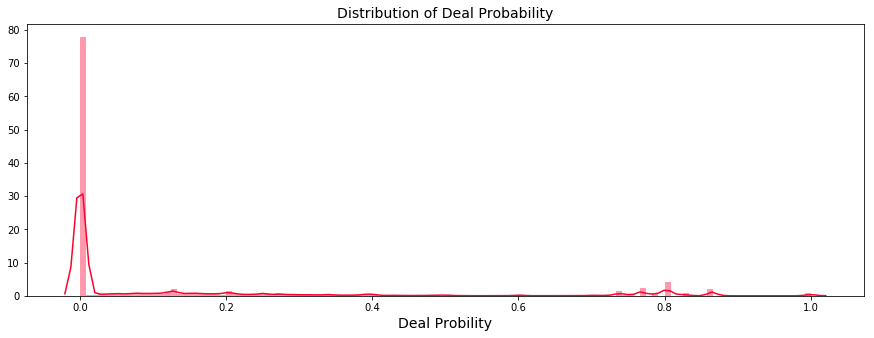

In [11]:
## 1. Deal Probability Distribution
def generate_histogram_plot(df, col, title):
    trace = go.Histogram(x = df[col]) 
    layout = go.Layout(title=title, legend=dict(orientation="h"), height=400)
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig)


# generate_histogram_plot(train_df, 'deal_probability', 'Distribution of Deal Probability')
plt.figure(figsize=(15,5))
sns.distplot(train_df["deal_probability"].values, bins=120, color="#ff002e")
plt.xlabel('Deal Probility', fontsize=14);
plt.title("Distribution of Deal Probability", fontsize=14);
plt.show();

### Deal Probability Bins

In [ ]:
def _generate_bar_plot_hor(df, col, title, color, w=None, h=None, lm=0, limit=100):
    cnt_srs = df[col].value_counts()[:limit]
    trace = go.Bar(y=cnt_srs.index[::-1], x=cnt_srs.values[::-1], orientation = 'h',
        marker=dict(color=color))

    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def _generate_bar_plot_ver(df, col, title, color, w=None, h=None, lm=0, limit=100, need_trace = False):
    cnt_srs = df[col].value_counts()[:limit]
    trace = go.Bar(x=list(cnt_srs.index), y=list(cnt_srs.values),
        marker=dict(color = color))
    if need_trace:
        return trace
    if w != None and h != None:
        layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    else:
        layout = dict(title=title, margin=dict(l=lm))
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

trace1 = _generate_bar_plot_ver(train_df, 'deal_class_2', "Deal Probability Bins", '#7a8aa3', lm=0, limit=30, need_trace = True)
trace2 = _generate_bar_plot_ver(train_df, 'deal_class', "Deal Proabibilities (>0.5 or <= 0.5)", ['#f25771','#93ef51'], 200, limit=30, need_trace = True)

fig = tools.make_subplots(rows=1, cols=3, specs=[[{'colspan': 2}, {},{}]], print_grid=False, subplot_titles = ['Deal Probability Bins','','Deal Proabibilities (>0.5 or <= 0.5)'])
fig.append_trace(trace1, 1, 1);
fig.append_trace(trace2, 1, 3);

fig['layout'].update(height=400, title='',showlegend=False)
iplot(fig); 